In [100]:
import secrets
import hashlib
from random import SystemRandom
import matplotlib.pyplot as plt
import math

a) Compute the SHA256 hash of your email-id. Let it be h1

In [101]:
def find_hash_hex(x):
    hash = hashlib.sha256(x.encode())
    h = hash.hexdigest()
    return h

def find_hash_bin(x):
    hash = hashlib.sha256(x.encode())
    h = hash.digest()
    return h

original_email = "maniya.1@iitj.ac.in"
h1 = find_hash_hex(original_email)
print(f"My email-id \t\t: {original_email}\nHash of my email-id \t: {h1}")


My email-id 		: maniya.1@iitj.ac.in
Hash of my email-id 	: 56b7896996ede4ae5517e9545a7b6130d518e72a4d940542da021d3d5979663a


b) Find another IIT Jodhpur email-id (i.e. the format of the id should be x@iitj.ac.in where you need to find a suitable value for the variable x) which has the hash value h2, such that h1 and h2 match in the first 16 bits.


In [113]:
def generate_random_iitj_email():
    cryptogen = SystemRandom()
    N = cryptogen.randint(3, 10)
    y = ''
    for j in range(N):
        y += ''.join(secrets.choice(string.ascii_lowercase))
    y += '.'
    M = cryptogen.randint(1, 99)
    y += str(M)
    y += '@iitj.ac.in'
    return y


def find_match_with_given_hash(h1, flag=False):
    attempts = 0
    while(True):
        x = generate_random_iitj_email()
        attempts += 1
        h2 = find_hash_hex(x)
        if(h1[0] == h2[0] and h1[1] == h2[1] and h1[2] == h2[2] and h1[3] == h2[3]):
            if flag:
                print(f"My email-id \t\t\t: {original_email}")
                print(f"Hash of my email-id \t\t: {h1}\n")
                print(f"x@iitj.ac.in email-id \t\t: {x}")
                print(f"Hash of x@iitj.ac.in found \t: {h2}\n")
            break
    if flag:
        print(f"Number of attempts made \t: {attempts}")
    return attempts


find_match_with_given_hash(h1, True)


My email-id 			: maniya.1@iitj.ac.in
Hash of my email-id 		: 56b7896996ede4ae5517e9545a7b6130d518e72a4d940542da021d3d5979663a

x@iitj.ac.in email-id 		: gxovmmrap.35@iitj.ac.in
Hash of x@iitj.ac.in found 	: 56b72aac58fcb70840b8fa60977afa7cd545b35786640512208f5f9303bf4423

Number of attempts made 	: 22419


22419

c) Repeat the above 10 times and store the number of calls you made to the SHA256 hashing algorithm in each of these trials. If the average number of calls to SHA256 is t then report the value of log2(t).

In [117]:
all_attempts = []

for i in range(10):
    cryptogen = SystemRandom()
    attempts = find_match_with_given_hash(h1)
    all_attempts.append(attempts)

avg_attempts = sum(all_attempts)/10

print(f"Average no. of calls made \t: {avg_attempts}")
print(f"log2(Average no. of calls) \t: {math.log2(avg_attempts):.4f}")

Average no. of calls made 	: 48302.6
log2(Average no. of calls) 	: 15.5598


[]

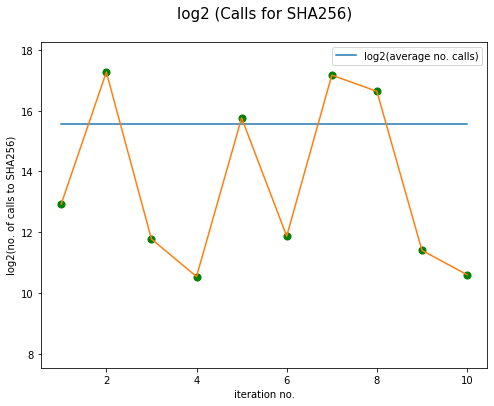

In [125]:
log2attempts = [math.log2(x) for x in all_attempts]
plt.figure(figsize=(8, 6))
plt.title('log2 (Calls for SHA256)\n', fontsize=15)
plt.plot([1,10], [math.log2(avg_attempts)]*2, label='log2(average no. calls)')
plt.plot(range(1,11), log2attempts)
plt.scatter(range(1,11), log2attempts, s=50, c='green')
plt.xlabel('iteration no.')
plt.ylabel('log2(no. of calls to SHA256)')
plt.ylim(min(log2attempts)-3, max(log2attempts)+1)
plt.legend()
plt.plot()

d) Comment on the value you reported above. Why are you getting this specific value?

Maximum Cost for finding a hash that matches in the first 16 bits with the hash of original mail should be O(2^16) as probability that their 16 bits match would be 2^16.
Also, average cost for finding a hash which matches in the first 16 bits with the hash of original mail should be O((2^16)/2) = O(2^15) and the corresponding probability would be 2^(-15) .

Hence 1 out of 2^15  calls would give a hash with the ‘first 16 bits match’.

Result we get in (c) is 2^(15.29) calls which is considerably near to 2^15.

e) Find two email-ids of the form x@iitj.ac.in and y@iitj.c.in such that their hash values match in the first 16 bits.

In [126]:
def collision_resistance(flag = False):
    hash_to_email = {}
    attempts = 0
    while(True):
        y = generate_random_iitj_email()
        h1 = find_hash_hex(y)
        s = str(h1[0]) + str(h1[1]) + str(h1[2]) + str(h1[3])
        if(s not in hash_to_email):
            hash_to_email[s] = y
        else:
            if flag:
                print(f"x@iitj.ac.in email-id \t: {hash_to_email[s]}")
                print(f"Hash of x@iitj.ac.in \t: {find_hash_hex(hash_to_email[s])}\n")
                print(f"y@iitj.ac.in email-id \t: {y}")
                print(f"Hash of y@iitj.ac.in \t: {h1}\n")
                print(f"Attempts \t\t: {attempts}")
            break
        attempts += 1
    return attempts


collision_resistance(True)


x@iitj.ac.in email-id 	: trpzivo.59@iitj.ac.in
Hash of x@iitj.ac.in 	: f60893870f2ce9df0617da482d79e09c807dec5f15950b74e30671a8dc15c0eb

y@iitj.ac.in email-id 	: nlylzrgsmu.21@iitj.ac.in
Hash of y@iitj.ac.in 	: f6084d83b9131cb11e33f4db831ffe947a73a2f59c001cba0b1fbe28012d7542

Attempts 		: 409


409

f) Repeat the above 10 times, and report the average number of trials as in part (c)

In [127]:
all_attempts = []

for i in range(10):
    attempts = collision_resistance()
    all_attempts += [attempts]
    
print(f"Average no. of calls made \t: {sum(all_attempts)/10}")
print(f"log2(Average no. of calls) \t: {math.log2(sum(all_attempts)/10):.4f}")

Average no. of calls made 	: 306.1
log2(Average no. of calls) 	: 8.2579


[]

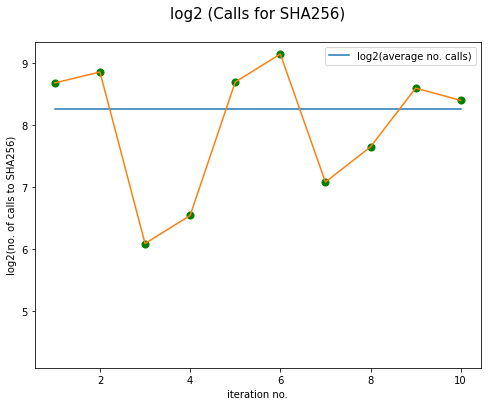

In [132]:
log2attempts = [math.log2(x) for x in all_attempts]
plt.figure(figsize=(8, 6))
plt.title('log2 (Calls for SHA256)\n', fontsize=15)
plt.plot([1,10], [math.log2(sum(all_attempts)/10)]*2, label='log2(average no. calls)')
plt.plot(range(1,11), log2attempts)
plt.scatter(range(1,11), log2attempts, s=50, c='green')
plt.xlabel('iteration no.')
plt.ylabel('log2(no. of calls to SHA256)')
plt.ylim(min(log2attempts)-2, max(log2attempts)+0.2)
plt.legend()
plt.plot()

g) Comment on the value you reported above. Why are you getting this value? Why is it different from the one in part (c)?

Here, √(216) would be equal to 28 . Thus, value of t should come 28 and value of log2t should come to 8, which matches with the output generated by code in part (f).